<a href="https://colab.research.google.com/github/yangchangnaihoby/python/blob/master/Day_021_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-24 04:36:47--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-24 04:36:47--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-24 04:36:48--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [30]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('/content/fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [31]:
fruits_2d = fruits.reshape(-1, 100 * 100)
print(fruits_2d.shape)

(300, 10000)


In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state = 24)
km.fit(fruits_2d)
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [33]:
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [34]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1) :
  n = len(arr)
  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)
  for i in range(rows) :
    for j in range(cols) :
      if i * 10 + j < n :
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

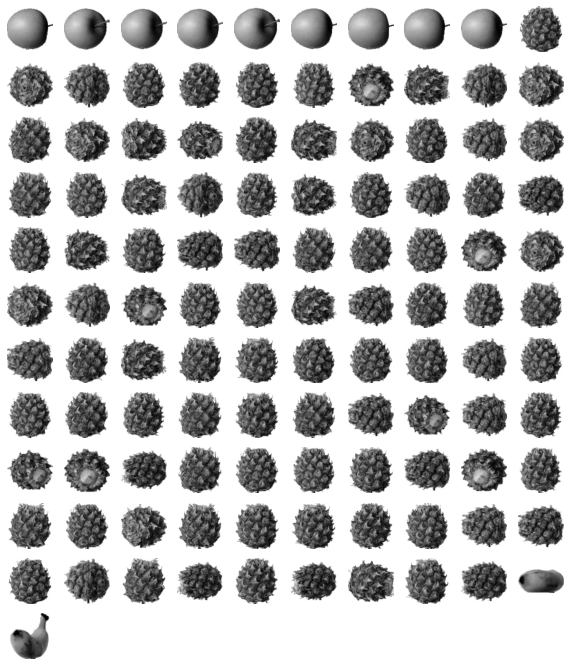

In [35]:
draw_fruits(fruits[km.labels_ == 2])

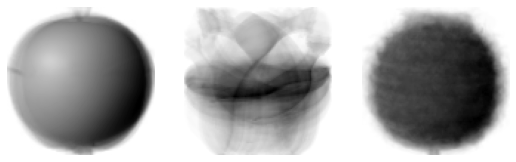

In [36]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio = 3)

In [37]:
print(km.transform(fruits_2d[100 : 101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [38]:
print(km.predict(fruits_2d[100 : 101]))

[2]


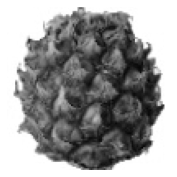

In [39]:
draw_fruits(fruits[100 : 101], ratio = 3)

In [40]:
print(km.n_iter_)

5


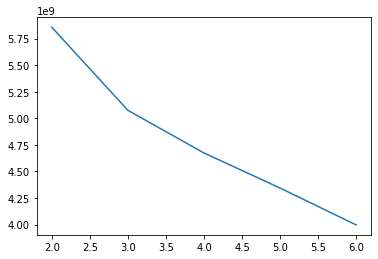

In [44]:
inertia = []
for k in range(2, 7) :
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.show()

In [45]:
from sklearn._config import get_config, set_config
set_config(print_changed_only = False)

In [46]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, random_state=42, tol=0.0001, verbose=0)